*Ressources numériques – Programme BCPST2 2022*
---


---
# Domaine d'existence d'un solide ionique : application à la précipitation sélective
---

**Capacité numérique disciplinaire :**  à l’aide d’un langage de programmation, déterminer les conditions optimales pour séparer deux ions par précipitation sélective.


---



Ce document présente le tracé de deux diagrammes présentant le taux de précipitation de deux cations au sein d'un mélange en fonction de la concentration de l'anion :
* **Cas 1 :** Précipitation des ions calcium $\mathsf{Ca^{2+}}$ et magnésium $\mathsf{Mg^{2+}}$ par introduction d'ions hydroxyde $HO^-$,
* **Cas 2 :** Précipitation des ions fer(II) $\mathsf{Fe^{2+}}$ et cuivre(II) $\mathsf{Cu^{2+}}$ par introduction d'ions oxalate $\mathsf{C_2O_4^{2-}}$.      

L'objectif est d'analyser les courbes obtenues dans le but d'identifier des conditions expérimentales permettant une précipitation sélective de l'un des cations.

Une dernière partie, à destination des professeurs, propose de déterminer la composition du système à l'état final, suite à l'introduction d'une quantité donnée d'ions oxalate dans un mélange d'ions fer(II) $\mathsf{Fe^{2+}}$ et cuivre(II) $\mathsf{Cu^{2+}}$. Ce calcul permet de préciser les conditions optimales permettant une élimination de l'un des cations.


---
# Précipitation des ions calcium et magnésium par les ions hydroxyde

---


### Principe de recherche de l'état final

Lorsque la solution est saturée en un solide ionique, l'équilibre chimique mettant en jeu le solide ionique et ses ions constitutifs en solution est établi.

Pour savoir si le solide existe, il faut d'abord vérifier que les concentrations du cation et de l'anion vérifient la **condition de précipitation**. Par exemple, le solide $\mathsf{Ca(OH)_2}$ se forme si $\mathsf{\frac{[Ca^{2+}]\cdot{[HO^-]}^2}{(C°)^3}>= K_s}$. 

Si le solide existe, alors la solution est saturée et la relation de Guldberg-Waage peut être écrite :
\begin{equation}\mathsf{
  Ca(OH)_2(s)=Ca^{2+}(aq)+2HO^{-}(aq) \\
  K_s=Qr_{eq}=\frac{[Ca^{2+}]_{eq} \cdot {[HO^-]_{eq}}^2}{(C°)^3}}
\end{equation}

En choisissant arbitrairement une valeur de $pH$, il est donc possible de :
1. déterminer la concentration d'ions hydroxyde $\mathsf{[HO^-]= (C°)^2 \cdot \frac{K_e}{[H_3O^+]}}$
2. vérifier si le solide existe ou non,
3. en déduire la concentration du cation en solution.


### Bibliothèques utilisées

La commande `linspace` de la bibliothèque `numpy` permet de générer une liste d'abscisses.

La bibliothèque `matplolib` est utilisée pour tracer des graphiques. 


### Manipulation du script

L'utilisateur peut modifier les valeurs des concentrations initiales des cations dans la solution traitée. 
Le script peut également être adapté pour traiter le cas d'autres hydroxydes métalliques à condition d'adapter les expressions des équations à résoudre en fonction de la stoechiométrie des sels ioniques et de modifier les valeurs des produits de solubilité.


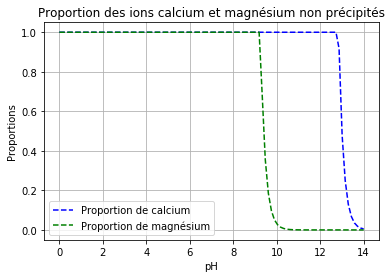

In [2]:
#IMPORTATION DES BIBLIOTHEQUES

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as op

#SAISIE DES VALEURS DES PRODUITS DE SOLUBILITE
pKs1=5.3    #hydroxyde de calcium
pKs2=10.8   #hydroxyde de magnésium

#SAISIE DES CONCENTRATIONS DES CATIONS DANS LE MELANGE INITIAL
CCa=0.001   #ions calcium, en mol/L
CMg=0.05    #ions magnésium, en mol/L

#CREATION D'UNE LISTE DE VALEURS DE pH (abscisse du diagramme)
pH=np.linspace(0,14,100)

#BOUCLE DE CALCUL (calcul des concentrations des cations selon la valeur du pH)
fCa=[]
fMg=[]

for x in pH :
    if CCa*10**(2*(x-14))>10**(-pKs1) :
        fCa.append(10**(-pKs1-2*x+28)/CCa)
    else :
        fCa.append(1)

for x in pH :
    if CMg*10**(2*(x-14))>10**(-pKs2) :
        fMg.append(10**(-pKs2-2*x+28)/CMg)
    else :
        fMg.append(1)

#TRACE DU DIAGRAMME
plt.figure(1)
plt.plot(pH,fCa,'b--', label='Proportion de calcium')
plt.plot(pH,fMg,'g--', label='Proportion de magnésium')
plt.xlabel('pH')
plt.ylabel('Proportions')
plt.title('Proportion des ions calcium et magnésium non précipités')
plt.legend()
plt.grid()
plt.show()

### Conclusion
Le $\mathsf{pH}$ nécessaire pour entraîner la formation de l'hydroxyde de magnésium est inférieur à celui nécessaire permettant de former l'hydroxyde de calcium.
Ainsi, dans le cadre de la détermination de la dureté d'une eau par titrage complexométrique, il pourrait être envisagé, à condition de choisir convenablement la valeur du $\mathsf{pH}$, de faire précipiter sélectivement les ions magnésium(II) sans faire précipiter les ions calcium(II). Le mélange, une fois filtré, serait épuré des ions magnésium, permettant d'envisager un titrage exclusif des ions calcium.

---

# 2 - Précipitation des ions cuivre(II) et fer(II) par les ions oxalate

---


### Principe de recherche de l'état final

Le principe est identique à celui présenté précédemment à la différence que la stoechiométrie des sels est cette fois 1:1.

Le script est écrit pour prévoir la proportion des ions cuivre(II) et fer(II) qui devraient précipiter dans le cas du traitement d'un mélange de ces ions ($\mathsf{25 mL}$ d'une solution acidifiée à $\mathsf{pH = 2,5}$ de sulfate de cuivre et de sel de Mohr à $\mathsf{0,5 mol \cdot L^{-1}}$) par $\mathsf{30 mL}$ d'une solution d'oxalate d'ammonium à $\mathsf{0,5 mol \cdot L^{-1}}$).

Les propriétés acides et basiques des différentes espèces ont été négligées pour simplifier l'étude.

De telles précipitations sont mises en jeu dans les opérations de récupération de métaux lourds lors du traitement de batteries, notamment NiMH.


### Manipulation du script

L'utilisateur peut modifier les valeurs des concentrations initiales des cations dans la solution traitée. 
Le script peut également être adapté pour traiter le cas d'autres oxalates métalliques à condition d'adapter les expressions des équations à résoudre en fonction de la stoechiométrie des sels ioniques et de modifier les valeurs des produits de solubilité.


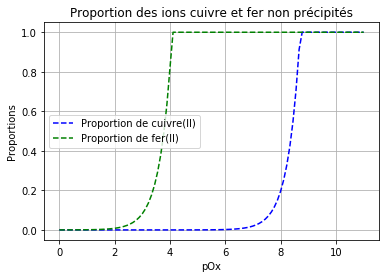

In [3]:
#IMPORTATION DES BIBLIOTHEQUES
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as op

#SAISIE DES VALEURS DES PRODUITS DE SOLUBILITE
pKs1=9.35    #oxalate de cuivre
pKs2=4.73     #oxalate de fer


#SAISIE DES CARACTERISTIQUES DU MELANGE A TRAITER

# Caractéristiques de l'effluent à traiter
CCu=0.5         #ions cuivre(II) en mol/L
CFe=0.5         #ions fer(II) en mol/L
Veff = 0.025    #volume de l'effluent en L

# Caractéristiques de la solution traitante
COx=0.5         #ions oxalate en mol/L
VOx=0.030       #volume de la solution traitante en L


#CALCUL DES QUANTITES DE MATIERE ET DU VOLUME TOTAL
NCu = CCu * Veff
NFe = CFe * Veff
NOx = COx * VOx
V = Veff + VOx


#CALCUL DES PROPORTIONS DES CATIONS QUI N'ONT PAS PRECIPITE

pOx=np.linspace(0,11,100)
fCu=[]
fFe=[]

#Concentration en ions calcium libre selon la valeur du pOx
for x in pOx :
    if NCu/V*10**(-x)>10**(-pKs1) :
        fCu.append(10**(-pKs1)*10**x/(NCu/V))
    else :
        fCu.append(1)

#Concentration en ions magnésium libre selon la valeur du pOx
for x in pOx :
    if NFe/V*10**(-x)>10**(-pKs2) :
        fFe.append(10**(-pKs2)*10**x/(NFe/V))
    else :
        fFe.append(1)


#TRACE DES COURBES DE DISTRIBUTION
plt.figure(2)
plt.plot(pOx,fCu,'b--', label='Proportion de cuivre(II)')
plt.plot(pOx,fFe,'g--', label='Proportion de fer(II)')
plt.xlabel('pOx')
plt.ylabel('Proportions')
plt.title('Proportion des ions cuivre et fer non précipités')
plt.legend()
plt.grid()
plt.show()

### Conclusion
La quantité de matière d'ions oxalate permettant d'entraîner la formation de l'oxalate de cuivre est inférieure à celle nécessaire pour former l'oxalate de fer.
En choisissant convenablement la valeur de $\mathsf{pOx}$, il est possible de précipiter la quasi-totalité des ions cuivre(II) sans précipiter les ions fer(II). 

---
# 3 - Pour aller plus loin : détermination de l'état final selon la quantité d'ions oxalate introduits

---


Le script précédent renseigne sur les proportions de cations en fonction de la valeur de $\mathsf{pOx}$ à l'équilibre, mais il n'indique pas la quantité de matière d'ions oxalate qu'il faut introduire pour obtenir cet état d'équilibre.

Le script proposé, à destination des professeurs, permet ainsi de déterminer la composition à l'état final en fonction de la quantité de matière d'ions oxalate introduite.

Deux réactions sont susceptibles de modéliser le système :
\begin{equation}\mathsf{
  Fe^{2+}(aq)+Ox^{2-}(aq)=FeOx(s) \\
  Cu^{2+}(aq)+Ox^{2-}(aq)=CuOx(s) }
\end{equation}

Selon la quantité apportée des ions oxalate et celles des ions fer(II) et cuivre(II) dans l'effluent à traiter, plusieurs situations peuvent être rencontrées :
* précipitation exclusive de l'un des sels,
* précipitation des deux sels,
* précipitation d'aucun des sels.

La recherche de l'état final nécessite d'abord de déterminer quel(s) solides sont formés. 

Ensuite, selon le nombre de sels formés, la recherche de l'état final nécessite de rechercher un ou deux valeurs d'avancement :
- le premier cas (une précipitation) nécessite de rechercher la racine d'un polynôme issu de l'écriture d'une relation de Guldberg-Waage,
- le second cas (deux précipitations) nécessite d'écrire deux relations de Guldberg-Waage et une équation d'électroneutralité afin d'obtenir une équation à une seule inconnue.

Le résultat de cette détermination peut être confronté aux courbes de pourcentage des cations pour valider ou invalider le résultat.



In [4]:
#IMPORTATION DES BIBLIOTHEQUES
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as op

#SAISIE DES VALEURS DES PRODUITS DE SOLUBILITE
pKs1=9.35    #oxalate de cuivre
pKs2=4.73     #oxalate de fer


#SAISIE DES CARACTERISTIQUES DU MELANGE A TRAITER

# Caractéristiques de l'effluent à traiter
CCu=0.5         #ions cuivre(II) en mol/L
CFe=0.5         #ions fer(II) en mol/L
Veff = 0.025    #volume de l'effluent en L

# Caractéristiques de la solution traitante
COx=0.5         #ions oxalate en mol/L
VOx=0.030       #volume de la solution traitante en L


#CALCUL DES QUANTITES DE MATIERE ET DU VOLUME TOTAL
NCu = CCu * Veff
NFe = CFe * Veff
NOx = COx * VOx
V = Veff + VOx


#CONDITIONS DE PRECIPITATION
NOxlim_Cu=10**(-pKs1)/NCu*V**2
NOxlim_Fe=10**(-pKs2)/NFe*V**2


#DETERMINATION DE LA COMPOSITION A L'ETAT FINAL

# Cas 1 : il n'y a pas assez d'oxalate pour former un précipité
if NOx < min(NOxlim_Cu,NOxlim_Fe) :
    NCuf=NCu
    NFef=NFe
    NOxf=NOx

# Cas 2 : un ou deux précipités se forme(nt). On envisage d'abord que les deux 
# solides coexistent à l'état final. 

if NOx >= min(NOxlim_Cu,NOxlim_Fe) :
    def EF(x) :
        return x**2 + (NCu+NFe-NOx)*x - (10**(-pKs1)+10**(-pKs2))*V**2
    NOxhyp=op.bisect(EF,0,1)
    # L'orientation de la parabole et la valeur en x= 0 de EF(x) est négative.
    # On est assuré de l'existence d'un zéro positif unique puisque le
    # discriminant est supérieur au coefficient de degré 1.
    NCuhyp=10**(-pKs1)/NOxhyp*V**2
    NFehyp=10**(-pKs2)/NOxhyp*V**2        
    
    if NOxhyp < NOx and NCuhyp < NCu and NFehyp < NFe :
    #toutes les espèces sont présentes à l'état final
        NOxf=NOxhyp
        NCuf=NCuhyp
        NFef=NFehyp
    
    else :
    #l'une des espèces ne peut exister
        
        if NOxlim_Cu < NOxlim_Fe :
        #L'oxalate de cuivre précipite mais pas l'oxalate de fer
            def EFCu(x) :
                return (NCu-x)*(NOx-x)-10**(-pKs1)*V**2
            xf=op.bisect(EFCu,0,NCu)  
            NFef=NFe
            NCuf=NCu-xf
            NOxf=NOx-xf
        
        if NOxlim_Cu > NOxlim_Fe :
        #L'oxalate de fer précipite mais pas l'oxalate de cuivre
            def EFFe(x) :
                return (NFe-x)*(NOx-x)-10**(-pKs2)*V**2
            xf=op.bisect(EFFe,0,NFe)  
            NFef=NFe-xf
            NCuf=NCu
            NOxf=NOx-xf

# Le script précédent peut être simplifié si l'on souhaite d'abord faire
# réfléchir les étudiants sur le cas pertinent à envisager 
# après analyse des courbes de distribution.


#AFFICHAGE DE LA COMPOSITION A L'ETAT FINAL

print("QUANTITES DE MATIERE À L'ÉTAT FINAL : ")
print('Ions cuivre : ',"{:.2e}".format(NCuf),' mol')
print('Ions fer : ',"{:.2e}".format(NFef),' mol')
print('Ions oxalate : ',"{:.2e}".format(NOxf),' mol')
print('')
print("VALEUR DE pOx À L'ÉTAT FINAL : ")
print('pOx_final = ',round(-np.log10((NOxf)/V),1))
print('')
print("EFFICACITE DE LA SEPARATION : ")
print('(',round(100*(1-NCuf/NCu)),' % du cuivre a précipité)')
print('(',round(100*(1-NFef/NFe)),' % du fer a précipité)')

QUANTITES DE MATIERE À L'ÉTAT FINAL : 
Ions cuivre :  2.40e-07  mol
Ions fer :  1.00e-02  mol
Ions oxalate :  5.63e-06  mol

VALEUR DE pOx À L'ÉTAT FINAL : 
pOx_final =  4.0

EFFICACITE DE LA SEPARATION : 
( 100  % du cuivre a précipité)
( 20  % du fer a précipité)
